In [15]:
from benchmark_funs import *
s = Sphere()
s.description
s.name
list(s.parameters()) #这是那个测试device的参数

[Parameter containing:
 tensor([0.0263], requires_grad=True)]

In [8]:
s = s.to('cuda')
%timeit s.get_device()
%timeit s._device_test.device
s = s.to('cpu')

651 ns ± 3.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
561 ns ± 2.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [4]:
x = torch.rand(10, 30, requires_grad=True)
q = s( x )
l = torch.sum(q)
l.backward()
x.grad


tensor([[0.6326, 1.3196, 0.7644, 1.2707, 1.4884, 0.2797, 1.5990, 1.8283, 1.6190,
         0.6705, 1.8451, 0.7996, 1.4440, 0.1161, 1.6080, 0.2471, 0.4700, 1.4180,
         1.1744, 1.6733, 0.7270, 0.5199, 1.9526, 1.4453, 1.8348, 0.7349, 0.0074,
         0.3696, 0.6229, 1.0052],
        [1.4080, 1.9999, 0.2911, 1.8037, 1.5657, 1.2339, 1.1158, 1.7020, 0.5384,
         0.4203, 1.8474, 1.4624, 1.4062, 1.5771, 1.8544, 0.9241, 0.6519, 0.0733,
         1.1941, 0.0170, 0.2417, 0.0612, 1.4727, 0.3978, 1.1301, 1.2923, 0.1283,
         1.1519, 0.2877, 0.9324],
        [1.7020, 1.5774, 1.2913, 0.8586, 0.6353, 0.4445, 1.6536, 0.3930, 1.8157,
         1.7337, 1.2439, 1.0789, 1.9421, 1.1532, 1.3335, 1.1640, 1.8741, 0.3506,
         1.5398, 0.2484, 1.0294, 0.9503, 1.1127, 0.0958, 1.8567, 1.5473, 0.9811,
         1.4592, 0.0978, 1.5583],
        [0.0145, 1.0008, 0.8649, 0.6445, 0.4210, 1.1106, 1.7016, 1.0440, 0.3191,
         0.8512, 1.6915, 0.2421, 0.2798, 0.9232, 1.8743, 0.4549, 1.2059, 0.8409,
       

In [16]:
x.dtype

torch.float32

/home/yecm/anaconda3/envs/torch2.0/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3488.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


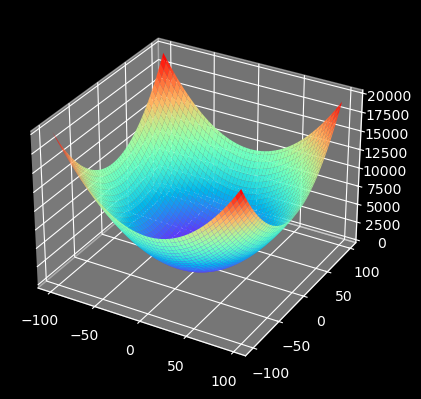

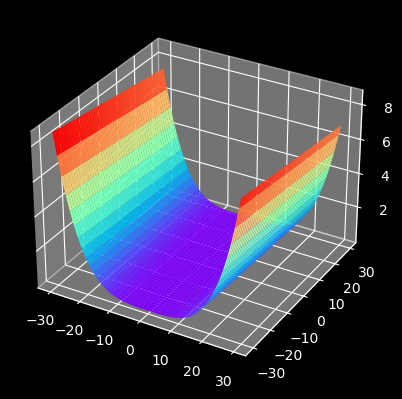

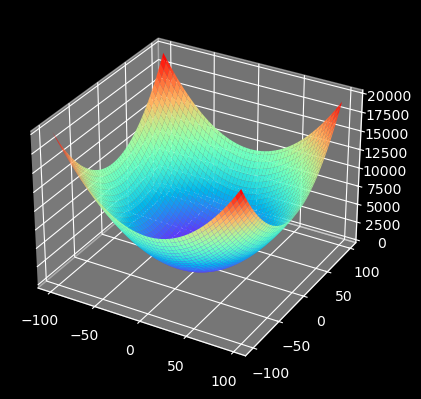

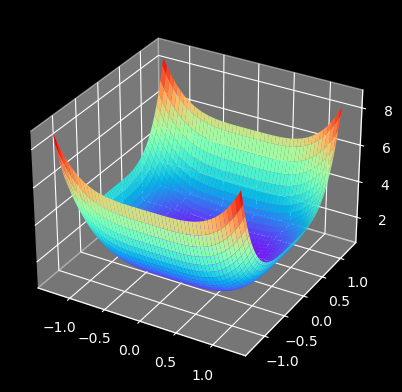

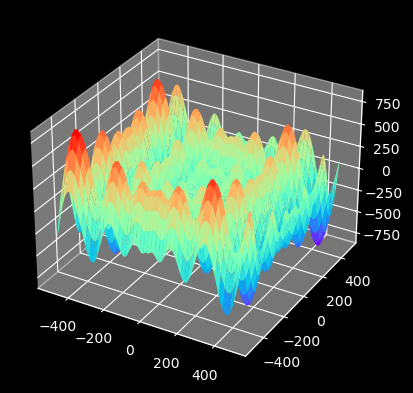

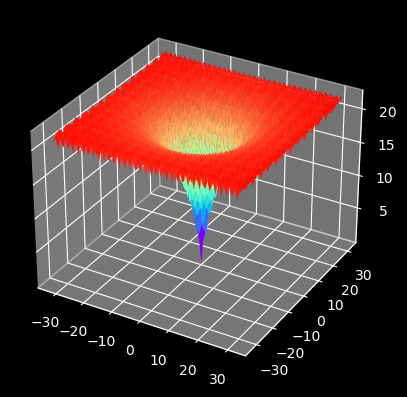

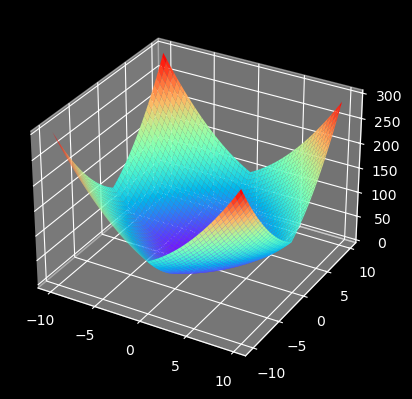

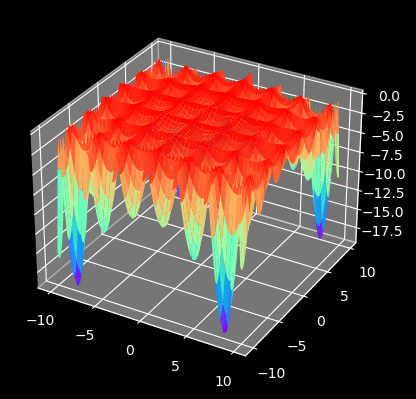

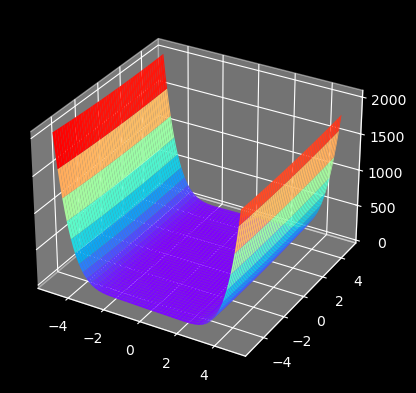

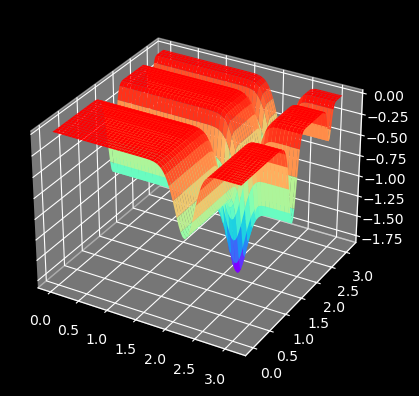

In [5]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
for fun in benchmark_functions:
    xx = torch.arange(fun.lb, fun.ub, (fun.ub-fun.lb)/100)
    yy = torch.arange(fun.lb, fun.ub, (fun.ub-fun.lb)/100)
    X, Y = torch.meshgrid(xx, yy)
    Z = fun( torch.stack([X, Y], dim=2).reshape(-1, 2) ).reshape(100, 100)
    fig = plt.figure()
    ax3 = fig.add_subplot(111, projection='3d')
    ax3.plot_surface(X, Y, Z, cmap='rainbow')
    plt.savefig(f"figs/{fun.name}.png")
    # break

In [11]:
# 对时间的测试
device = torch.device("cpu")
for fun in benchmark_functions:
    print(fun.get_device())
    x = torch.rand(1000, 2, requires_grad=True).to(device)
    fun = fun.to(device)
    %timeit fun(x)

cuda:0
30.3 µs ± 216 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
cuda:0
119 µs ± 494 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
cuda:0
51.2 µs ± 179 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
cuda:0
94.1 µs ± 159 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
cuda:0
88.9 µs ± 400 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
cuda:0
283 µs ± 2.08 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
cuda:0
58.9 µs ± 496 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
cuda:0
240 µs ± 5.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
cuda:0
272 µs ± 1.98 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
cuda:0
244 µs ± 713 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
device = torch.device("cuda:0")
with torch.no_grad(): # 不计算梯度
    for fun in benchmark_functions:
        fun = fun.to(device)
        assert fun.get_device()==device
        fun.eval() # 不反向传播，但是会计算梯度？
        # %timeit  fun.to(device) # 8.24 µs ± 56.9 ns
        x = torch.rand(1000, 30).to(device) # 变大了也差不多快。
        %timeit fun(x)
        # fun(x)

20.7 µs ± 147 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
98.8 µs ± 319 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
39.3 µs ± 196 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
87.5 µs ± 145 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
51.3 µs ± 51 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
143 µs ± 1.01 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
48.7 µs ± 217 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
143 µs ± 146 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
121 µs ± 704 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
112 µs ± 516 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [13]:
10000*fun.dimension

20000